<a href="https://colab.research.google.com/github/GladiceLee/US_Regional_Sales/blob/main/US_Regional_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('US_Regional_Sales_Data(1).csv')
print(df)

       OrderNumber Sales Channel WarehouseCode ProcuredDate OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004     31/12/17   31/5/18   
1      SO - 000102        Online  WARE-NMK1003     31/12/17   31/5/18   
2      SO - 000103   Distributor  WARE-UHY1004     31/12/17   31/5/18   
3      SO - 000104     Wholesale  WARE-NMK1003     31/12/17   31/5/18   
4      SO - 000105   Distributor  WARE-NMK1003    10/4/2018   31/5/18   
...            ...           ...           ...          ...       ...   
7986  SO - 0008087      In-Store  WARE-MKL1006      26/9/20  30/12/20   
7987  SO - 0008088        Online  WARE-NMK1003      26/9/20  30/12/20   
7988  SO - 0008089        Online  WARE-UHY1004      26/9/20  30/12/20   
7989  SO - 0008090        Online  WARE-NMK1003      26/9/20  30/12/20   
7990  SO - 0008091      In-Store  WARE-UHY1004      26/9/20  30/12/20   

      ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  \
0      14/6/18      19/6/18          USD  

# Calculate the lead time for each order by standardizing the delivery and order dates, then determining the difference between these dates. Identify and list the top three products with the longest lead times.

In [2]:
def standardized_date(date_str):
    try:
        # Infer the date format and handle both dd/mm/yy and dd/mm/yyyy
        return pd.to_datetime(date_str, dayfirst=True, errors='coerce').strftime('%d/%m/%Y')
    except Exception as e:
        print(f"Error parsing date: {date_str} -> {e}")
        return None

df['OrderDate'] = df['OrderDate'].apply(standardized_date)
df['DeliveryDate'] = df['DeliveryDate'].apply(standardized_date)

# Convert the standardized date strings to datetime objects
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d/%m/%Y', errors='coerce')
df['DeliveryDate'] = pd.to_datetime(df['DeliveryDate'], format='%d/%m/%Y', errors='coerce')

df['date_difference'] = (df['DeliveryDate'] - df['OrderDate']).dt.days

if df['OrderDate'].isna().any() or df['DeliveryDate'].isna().any():
    print("Warning: Some dates could not be parsed and are NaT.")

print("DataFrame with Date Differences:")
print(df[['_ProductID', 'OrderDate', 'DeliveryDate', 'date_difference']])

average_lead_time = df.groupby('_ProductID')['date_difference'].mean()

# Sort the products by average lead time in descending order
sorted_lead_time = average_lead_time.sort_values(ascending=False)

# Select the top three products with the longest lead time
top_three_products = sorted_lead_time.head(3)
print("\nTop three products with the longest lead time:")
print(top_three_products)

top_products_data = df[df['_ProductID'].isin(top_three_products.index)]
print("\nDetails of the Top Three Products with the Longest Lead Time:")
print(top_products_data)

DataFrame with Date Differences:
      _ProductID  OrderDate DeliveryDate  date_difference
0             12 2018-05-31   2018-06-19               19
1             27 2018-05-31   2018-07-02               32
2             16 2018-05-31   2018-07-01               31
3             23 2018-05-31   2018-06-07                7
4             26 2018-05-31   2018-06-26               26
...          ...        ...          ...              ...
7986          29 2020-12-30   2021-01-14               15
7987           3 2020-12-30   2021-01-04                5
7988          35 2020-12-30   2021-01-26               27
7989          36 2020-12-30   2021-01-25               26
7990          43 2020-12-30   2021-01-19               20

[7991 rows x 4 columns]

Top three products with the longest lead time:
_ProductID
16    22.299435
6     22.097403
36    21.647059
Name: date_difference, dtype: float64

Details of the Top Three Products with the Longest Lead Time:
       OrderNumber Sales Channel Wareh

# Determine the total quantity ordered for each product by its ID. Identify and rank the top three products based on the highest order frequency.

In [3]:
product_id = pd.Series(df['_ProductID'])
print(product_id)
order_quantity = pd.Series(df['Order Quantity'])
print(order_quantity)

my_dict_product = {}

for i in range(len(product_id)):
  if product_id[i] in my_dict_product:
    my_dict_product[product_id[i]] += order_quantity[i]
  else:
    my_dict_product[product_id[i]] = order_quantity[i]

print(my_dict_product)
n = pd.Series(my_dict_product)
print(n)
print(n.nlargest(3))

0       12
1       27
2       16
3       23
4       26
        ..
7986    29
7987     3
7988    35
7989    36
7990    43
Name: _ProductID, Length: 7991, dtype: int64
0       5
1       3
2       1
3       8
4       8
       ..
7986    1
7987    6
7988    5
7989    8
7990    5
Name: Order Quantity, Length: 7991, dtype: int64
{12: 827, 27: 830, 16: 814, 23: 956, 26: 723, 1: 681, 5: 811, 46: 817, 47: 680, 13: 777, 38: 832, 40: 855, 39: 717, 32: 660, 6: 663, 25: 809, 3: 764, 20: 798, 24: 759, 33: 695, 35: 770, 15: 658, 36: 769, 37: 896, 14: 766, 7: 735, 17: 807, 2: 819, 34: 635, 11: 814, 8: 879, 44: 585, 22: 837, 4: 878, 45: 786, 21: 789, 10: 755, 28: 809, 29: 818, 18: 644, 30: 656, 31: 768, 43: 771, 9: 772, 41: 854, 19: 772, 42: 652}
12    827
27    830
16    814
23    956
26    723
1     681
5     811
46    817
47    680
13    777
38    832
40    855
39    717
32    660
6     663
25    809
3     764
20    798
24    759
33    695
35    770
15    658
36    769
37    896
14    766
7     735


# Identify the top five product IDs with the highest order quantities and the longest lead times, indicating their potential for stocking.

In [4]:
df_1 = pd.DataFrame({
    'order_quantity': n,
    'lead_time': sorted_lead_time
})

df_1['score'] = df_1['order_quantity'] + df_1['lead_time']

df_1_sorted = df_1.sort_values(by='score', ascending=False)
top_five = df_1_sorted.head(5)
top_five

,order_quantity,lead_time,score
23,956,20.505155,976.505155
37,896,21.205000,917.205000
8,879,19.835897,898.835897
4,878,20.105000,898.105000
40,855,21.059783,876.059783


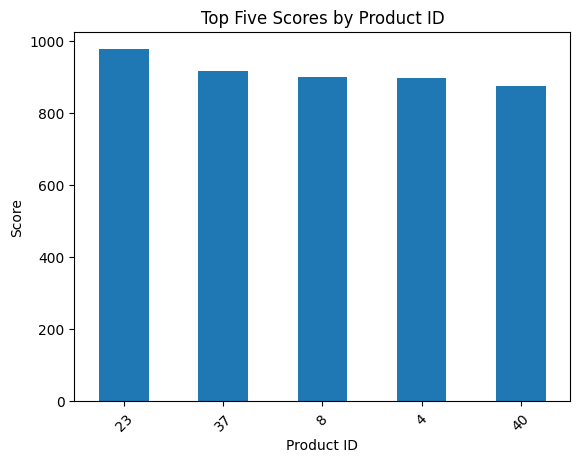

In [5]:
top_five.plot(kind='bar', y='score', legend=False)
plt.title('Top Five Scores by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

#Calculate the amount of order each sales team made.

In [9]:
sales_team = pd.Series(df['_SalesTeamID'])
print(sales_team)

my_dict_team = {}

for team in sales_team:
  if team in my_dict_team:
    my_dict_team[team] += 1
  else:
    my_dict_team[team] = 1

print(my_dict_team)

0        6
1       14
2       21
3       28
4       22
        ..
7986     9
7987    14
7988    14
7989    20
7990     6
Name: _SalesTeamID, Length: 7991, dtype: int64
{6: 265, 14: 261, 21: 296, 28: 247, 22: 266, 12: 314, 10: 260, 4: 292, 23: 277, 8: 315, 9: 285, 5: 283, 25: 259, 2: 246, 7: 303, 24: 284, 18: 316, 20: 288, 13: 340, 19: 293, 17: 275, 26: 296, 11: 289, 15: 271, 16: 298, 27: 274, 3: 296, 1: 302}


#Calculate the amount of order each sales channel made.

In [13]:
sales_channel = pd.Series(df['Sales Channel'])
print(sales_channel)

my_dict_channel = {}

for channel in sales_channel:
  if channel in my_dict_channel:
    my_dict_channel[channel] += 1
  else:
    my_dict_channel[channel] = 1

print(my_dict_channel)

0          In-Store
1            Online
2       Distributor
3         Wholesale
4       Distributor
           ...     
7986       In-Store
7987         Online
7988         Online
7989         Online
7990       In-Store
Name: Sales Channel, Length: 7991, dtype: object
{'In-Store': 3298, 'Online': 2425, 'Distributor': 1375, 'Wholesale': 893}


In [10]:
# Remove any non-numeric characters ($ and commas)
df['Unit Price'] = df['Unit Price'].replace('[\$,]', '', regex=True).astype(float)
df['Unit Cost'] = df['Unit Cost'].replace('[\$,]', '', regex=True).astype(float)

df['Unit Profit'] = df['Unit Price'] - df['Unit Cost']
df['Total Profit'] = df['Order Quantity'] * df['Unit Profit']

print("DataFrame with Total Profit:")
print(df[['_ProductID', 'Unit Price', 'Unit Cost', 'Unit Profit', 'Order Quantity', 'Total Profit']])

DataFrame with Total Profit:
      _ProductID  Unit Price  Unit Cost  Unit Profit  Order Quantity  \
0             12      1963.1    1001.18       961.92               5   
1             27      3939.6    3348.66       590.94               3   
2             16      1775.5     781.22       994.28               1   
3             23      2324.9    1464.69       860.21               8   
4             26      1822.4    1476.14       346.26               8   
...          ...         ...        ...          ...             ...   
7986          29       234.5     121.94       112.56               1   
7987           3      3202.6    1921.56      1281.04               6   
7988          35      3825.7    2792.76      1032.94               5   
7989          36      1072.0     804.00       268.00               8   
7990          43      2211.0    1370.82       840.18               5   

      Total Profit  
0          4809.60  
1          1772.82  
2           994.28  
3          6881.68  
4

# Calculate the profit for each product ID by channel and the total profit generated by each channel

In [22]:
sales_channel = pd.Series(df['Sales Channel'])
total_profit = pd.Series(df['Total Profit'])

my_dict_1 = {'In-Store': {}, 'Online': {}, 'Distributor': {}, 'Wholesale': {}}

# Populate the dictionary with aggregated order quantities
for i in range(len(sales_channel)):
    channel = sales_channel[i]
    pid = product_id[i]
    ttp = total_profit[i]

    if pid in my_dict_1[channel]:
        my_dict_1[channel][pid] += ttp
    else:
        my_dict_1[channel][pid] = 0
        my_dict_1[channel][pid] += ttp

df_2 = pd.DataFrame(my_dict_1)
print(df_2)

aggregated_profit = {'In-Store': 0, 'Online': 0, 'Distributor': 0, 'Wholesale': 0}

# Populate the dictionary with total profits per channel
for i in range(len(sales_channel)):
    channel = sales_channel[i]
    ttp = total_profit[i]
    aggregated_profit[channel] += ttp/1000 #Standardize aggregated profits

# Convert the total profit dictionary to a DataFrame for easier display
df_aggregated_profit = pd.DataFrame(list(aggregated_profit.items()), columns=['Sales Channel', 'Aggregated Profit'])
print(df_aggregated_profit)

     In-Store     Online  Distributor  Wholesale
12  184563.98  281323.04    138159.70   67962.75
5   225359.18  244961.28    160683.43  119977.55
46  284849.49  182813.29    158666.71   65655.86
47  251341.47  121852.69    116309.86   66189.53
13  192212.40  179960.27    135774.51   59906.96
40  347914.70  226373.41     94022.62   98968.18
39  173052.35  247183.80    114291.26   65622.32
32  216707.03  118163.51    149061.25   48539.18
6   235856.04  172940.82     68702.73   52631.95
25  295038.35  166804.28    184263.92   63503.13
3   303811.39  186654.26    128084.26   73324.28
20  240490.56  210606.40    143311.96   87767.19
1   262576.79  193284.40     49759.81   45640.99
35  307414.30  179578.04    185146.21   69309.33
36  224664.16  191339.03     94164.60  100207.56
23  449741.98  261511.44    147340.51   50224.84
2   347091.42  217491.50    148749.04   70267.78
11  331829.85  195915.06    134926.03   78427.12
44  174405.84  143722.72    104419.08   41331.23
21  330041.49  19645

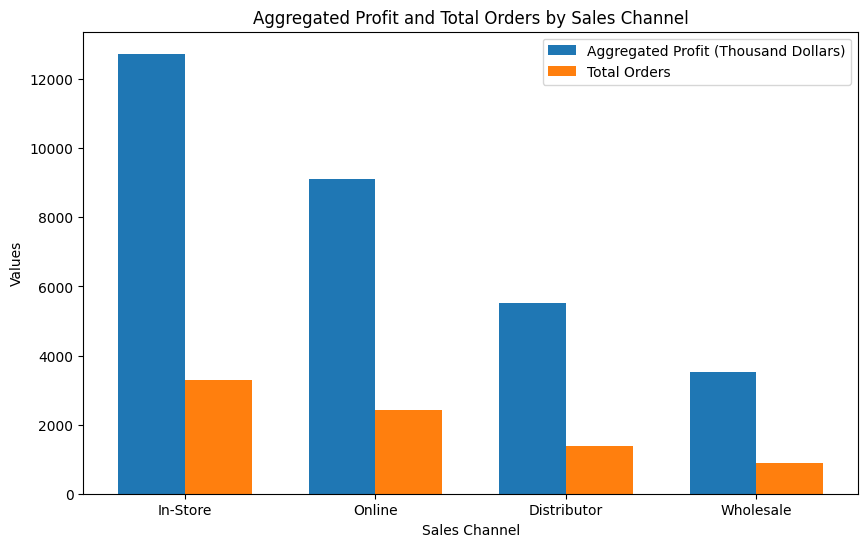

In [35]:
channels = df_aggregated_profit['Sales Channel']
aggregated_profit = df_aggregated_profit['Aggregated Profit']
total_orders = [my_dict_channel[channel] for channel in channels]

index = list(range(len(channels)))
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

bars_1 = ax.bar(index, aggregated_profit, bar_width, label='Aggregated Profit (Thousand Dollars)')
bars_2 = ax.bar([i + bar_width for i in index], total_orders, bar_width, label='Total Orders')

ax.set_xlabel('Sales Channel')
ax.set_ylabel('Values')
ax.set_title('Aggregated Profit and Total Orders by Sales Channel')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(channels)
ax.legend()

plt.show()

# Calculate the total profit generated by each sales team and the profit breakdown for each sales team by product ID

In [34]:
# Group by SalesTeamID and sum the Total Profit for each team
sales_team_profits = df.groupby('_SalesTeamID')['Total Profit'].sum().reset_index()
sales_team_profits = sales_team_profits.sort_values(by='Total Profit', ascending=False)

print("Profits by Sales Team:")
print(sales_team_profits)

# Group by SalesTeamID and ProductID, then sum the profits
team_product_profits = df.groupby(['_SalesTeamID', '_ProductID'])['Total Profit'].sum().reset_index()

# Sort the profits within each team in descending order
team_product_profits = team_product_profits.sort_values(by=['_SalesTeamID', 'Total Profit'], ascending=[True, False])

print("Profits by Sales Team and Product:")
print(team_product_profits)


Profits by Sales Team:
    _SalesTeamID  Total Profit
25            26    1251542.04
12            13    1217348.85
0              1    1214764.14
7              8    1210697.29
10            11    1210649.32
23            24    1173595.59
6              7    1170325.76
11            12    1169519.76
18            19    1167064.18
20            21    1136079.54
14            15    1121190.10
21            22    1117437.75
15            16    1110364.65
17            18    1084325.23
2              3    1080322.22
9             10    1075905.12
24            25    1064887.70
19            20    1063274.53
22            23    1059804.57
8              9    1058026.32
3              4    1048352.62
1              2    1044022.54
13            14    1028609.66
4              5    1025453.81
16            17    1020593.53
5              6    1003093.95
27            28     977467.66
26            27     969939.29
Profits by Sales Team and Product:
      _SalesTeamID  _ProductID  Total Profi

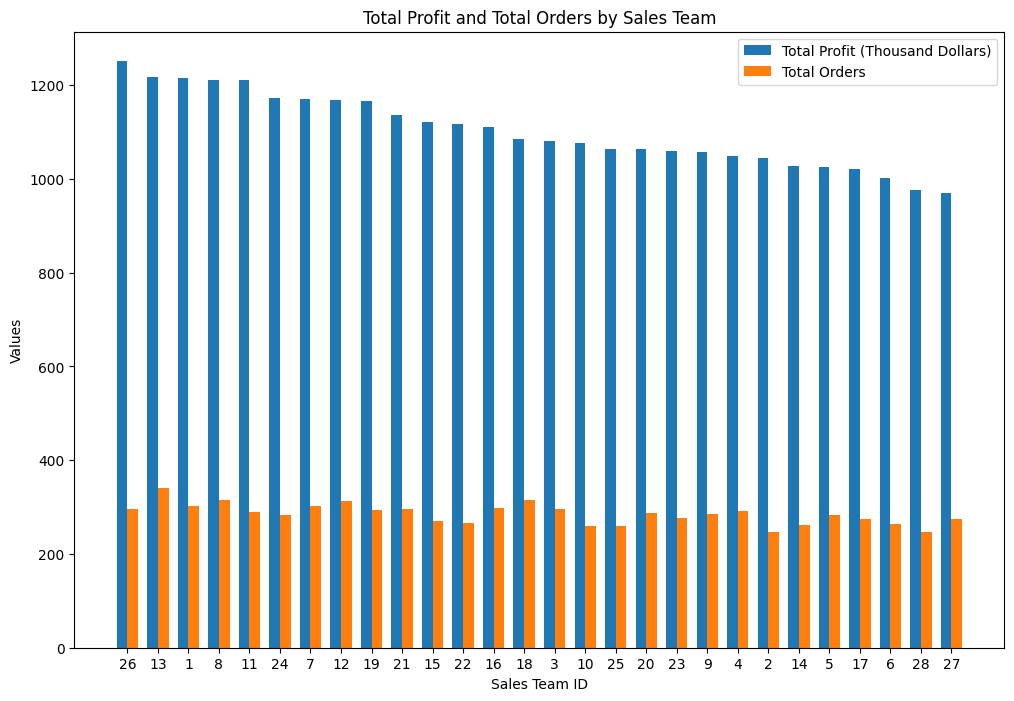

In [33]:
teams = sales_team_profits['_SalesTeamID']
profits = [p / 1000 for p in sales_team_profits['Total Profit']]  # Standardize total profit
orders = [my_dict_team[team] for team in teams]

# Generate a list of indices for the x-axis
index = list(range(len(teams)))

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35

# Bars for total profit, with 'million dollars' added to the label
bars1 = ax.bar(index, profits, bar_width, label='Total Profit (Thousand Dollars)')

# Bars for total orders, shifted by bar_width to avoid overlap
bars2 = ax.bar([i + bar_width for i in index], orders, bar_width, label='Total Orders')

# Adding labels and title
ax.set_xlabel('Sales Team ID')
ax.set_ylabel('Values')
ax.set_title('Total Profit and Total Orders by Sales Team')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(teams)
ax.legend()

# Displaying the plot
plt.show()